In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [99]:
df = pd.read_csv('covid19_data.csv')

In [101]:
df.drop(['SNo','Last Update'],axis=1, inplace=True)

In [103]:
df.head(5)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/01/2020,New York,Germany,589,556,69699
1,01/02/2020,New York,Italy,49337,2712,12240
2,01/03/2020,NaN,Spain,42259,3412,76395
3,01/04/2020,NaN,China,41540,1448,52546
4,01/05/2020,Hubei,Spain,1406,1012,89086


In [107]:
df.head()

,Data,Province,Country,Confirmed,Deaths,Recovered
0,01/01/2020,New York,Germany,589,556,69699
1,01/02/2020,New York,Italy,49337,2712,12240
2,01/03/2020,NaN,Spain,42259,3412,76395
3,01/04/2020,NaN,China,41540,1448,52546
4,01/05/2020,Hubei,Spain,1406,1012,89086


In [105]:
df.rename(columns={'ObservationDate':'Data','Province/State':'Province','Country/Region':'Country'},inplace=True)

In [109]:
df.rename(columns={"Data": "Date"}, inplace=True)
df.head()

,Date,Province,Country,Confirmed,Deaths,Recovered
0,01/01/2020,New York,Germany,589,556,69699
1,01/02/2020,New York,Italy,49337,2712,12240
2,01/03/2020,NaN,Spain,42259,3412,76395
3,01/04/2020,NaN,China,41540,1448,52546
4,01/05/2020,Hubei,Spain,1406,1012,89086


In [111]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Province,Country,Confirmed,Deaths,Recovered
0,2020-01-01,New York,Germany,589,556,69699
1,2020-01-02,New York,Italy,49337,2712,12240
2,2020-01-03,NaN,Spain,42259,3412,76395
3,2020-01-04,NaN,China,41540,1448,52546
4,2020-01-05,Hubei,Spain,1406,1012,89086


In [113]:
df.describe()

,Date,Confirmed,Deaths,Recovered
count,10000,10000.000000,10000.000000,10000.000000
mean,2020-06-29 09:43:12,50278.624700,2503.330800,44597.053500
min,2020-01-01 00:00:00,9.000000,1.000000,2.000000
25%,2020-03-30 00:00:00,25022.500000,1257.000000,22033.750000
50%,2020-06-28 00:00:00,50422.000000,2504.000000,44540.000000
75%,2020-09-29 00:00:00,75717.500000,3743.000000,66891.000000
max,2020-12-30 00:00:00,99990.000000,4998.000000,89999.000000
std,NaN,29030.638457,1439.231503,25951.719395


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10000 non-null  datetime64[ns]
 1   Province   7980 non-null   object        
 2   Country    10000 non-null  object        
 3   Confirmed  10000 non-null  int64         
 4   Deaths     10000 non-null  int64         
 5   Recovered  10000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 468.9+ KB


In [117]:
df = df.fillna('NA')

# Groupby

In [120]:
df.columns

Index(['Date', 'Province', 'Country', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

In [122]:
df2 = df.groupby('Country')[[ 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [124]:
df2

,Country,Confirmed,Deaths,Recovered
0,China,100157458,5004657,87789828
1,Germany,101202297,4990991,87907679
2,Italy,99119380,4938222,89952918
3,Spain,101816149,5070324,89846189
4,US,100490963,5029114,90473921


In [126]:
df3 = df2[df2['Confirmed']>7]
df3

,Country,Confirmed,Deaths,Recovered
0,China,100157458,5004657,87789828
1,Germany,101202297,4990991,87907679
2,Italy,99119380,4938222,89952918
3,Spain,101816149,5070324,89846189
4,US,100490963,5029114,90473921


# Matplotlib

In [133]:
import matplotlib.pyplot as plt

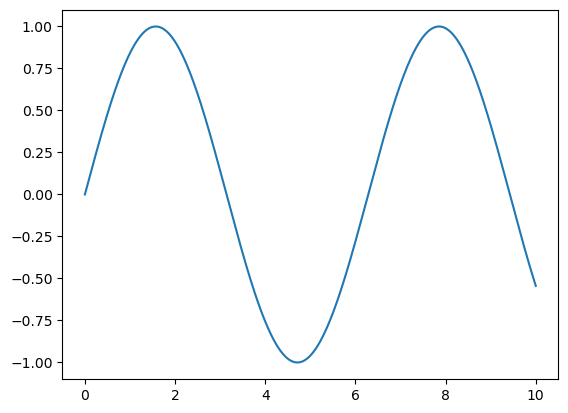

In [145]:
x = np.linspace(0,10,1000)
y = np.sin(x)
plt.plot(x,y)

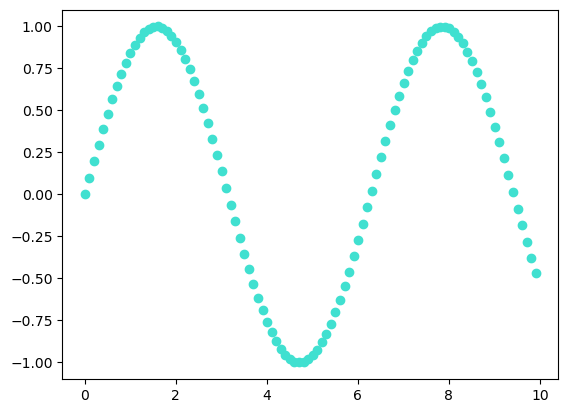

In [161]:
plt.scatter(x[::10],y[::10], color='Turquoise')

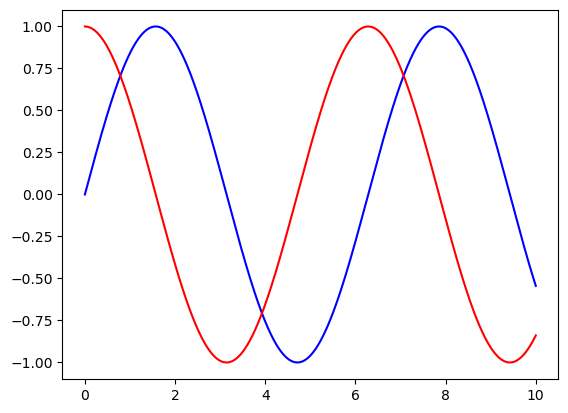

In [165]:
plt.plot(x,y,color='b')
plt.plot(x,np.cos(x),color='r')

In [169]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [171]:
df.rename(columns={'ObservationDate':'Data','Province/State':'Province','Country/Region':'Country'},inplace=True)

In [201]:
df3.head()

,Country,Confirmed,Deaths,Recovered
0,China,100157458,5004657,87789828
1,Germany,101202297,4990991,87907679
2,Italy,99119380,4938222,89952918
3,Spain,101816149,5070324,89846189
4,US,100490963,5029114,90473921


In [175]:
countries = df3['Country'].unique()
len(countries)

5

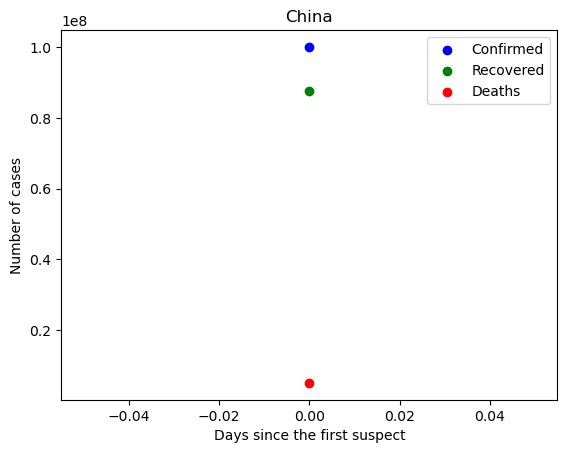

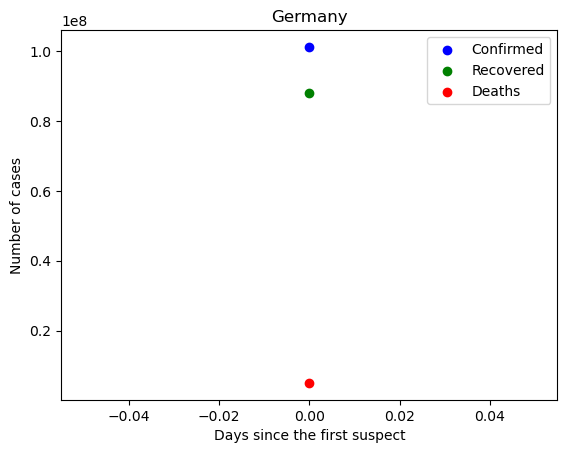

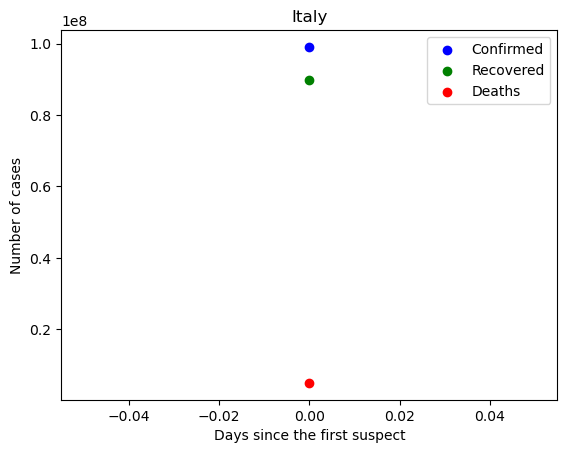

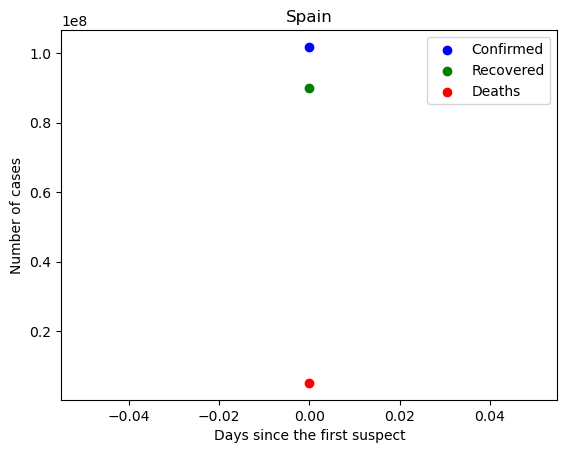

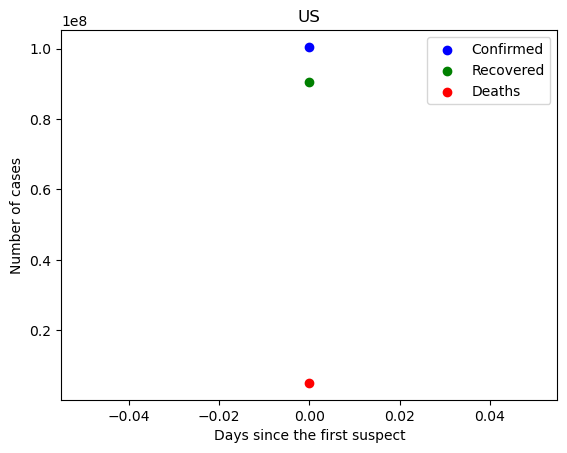

In [197]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()    

In [199]:
df3

,Country,Confirmed,Deaths,Recovered
0,China,100157458,5004657,87789828
1,Germany,101202297,4990991,87907679
2,Italy,99119380,4938222,89952918
3,Spain,101816149,5070324,89846189
4,US,100490963,5029114,90473921
